# 代码来自Groundbreaker 
# 想联系我的话花点心思不难找到我的联系方式
# 如果今年题目变了代码用不了了，可以在Github上找到我，我会尽快更新代码

In [1]:
import requests
import re
import time
import csv

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

message = []

由于需要爬取的数据过于庞大，有899页，不做处理的话会被网站拦截，因此做了判断
当发现被拦截后就从断点继续开始爬取

In [2]:
# 爬取原始数据需要十分钟以上，无特别需要不要运行此块代码
def fetchUrlWithRetry(url, maxRetries=3, retryDelay=5):# 判断有无被拦截
    retries = 0
    while retries < maxRetries:
        try:
            response = requests.get(url, headers=headers)
            if response.status_code == 200:
                return response.text
        except requests.exceptions.RequestException as e:
            print(f"Failed to fetch {url}. Retrying...")
            retries += 1
            time.sleep(retryDelay)
    return None

# 从断点处继续爬取数据
startI = 0
startJ = 0
filename = "content.csv"

try:
    with open(filename, 'r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        message = [row for row in reader]
    startI = len(message) // 100
    startJ = len(message) % 100
except FileNotFoundError:
    pass

for i in range(startI, 9):
    for j in range(startJ, 100):
        cnt = i * 100 + j
        if cnt == 0:
            url = "https://top.chinaz.com/gongsi/index_zhuce.html"
        else:
            url = "https://top.chinaz.com/gongsi/index_zhuce_{}.html".format(cnt + 1)
        html = fetchUrlWithRetry(url)
        if html:
            company = re.findall('<a.*?target="_blank">(.+?)</a></h3>', html)
            capital = re.findall('<em>(.+?)</em>', html)
            page = list(zip(company, capital))
            message.extend(page)
            print(f"Page {cnt} has been recorded.")
            if len(message) % 100 == 0:
                with open(filename, 'w', newline='', encoding='utf-8') as file:
                    writer = csv.writer(file)
                    writer.writerows(message)
        else:
            print(f"Failed to fetch page {cnt} after multiple retries.")


Page 0 has been recorded.
Page 1 has been recorded.
Page 2 has been recorded.
Page 3 has been recorded.
Page 4 has been recorded.
Page 5 has been recorded.
Page 6 has been recorded.
Page 7 has been recorded.
Page 8 has been recorded.
Page 9 has been recorded.
Page 10 has been recorded.
Page 11 has been recorded.
Page 12 has been recorded.
Page 13 has been recorded.
Page 14 has been recorded.
Page 15 has been recorded.
Page 16 has been recorded.
Page 17 has been recorded.
Page 18 has been recorded.
Page 19 has been recorded.
Page 20 has been recorded.
Page 21 has been recorded.
Page 22 has been recorded.
Page 23 has been recorded.
Page 24 has been recorded.
Page 25 has been recorded.
Page 26 has been recorded.
Page 27 has been recorded.
Page 28 has been recorded.
Page 29 has been recorded.
Page 30 has been recorded.
Page 31 has been recorded.
Page 32 has been recorded.
Page 33 has been recorded.
Page 34 has been recorded.
Page 35 has been recorded.
Page 36 has been recorded.
Page 37 has

In [3]:
import csv
with open("content.csv", "w") as f:
    w = csv.writer(f)
    w.writerows(message)

In [4]:
import pandas as pd

df = pd.read_csv("content.csv", names=["company", "capital"])

# 定义函数将字符串转换为数字
def strToNum(s):
    if '亿' in s:
        return float(s.replace('亿', '')) * 100000000
    elif '万' in s:
        return float(s.replace('万', '')) * 10000
    else:
        return float(s)
    
# 将capital列中的字符串转换为数字
df["capitalNum"] = df["capital"].apply(strToNum)

# 按capitalNum列从大到小排序并取前20名
df_sorted = df.sort_values(by="capitalNum", ascending=False).head(20)

print(df_sorted)


          company   capital    capitalNum
0         中国铁路总公司  10360.0亿  1.036000e+12
1    中央汇金投资有限责任公司  8282.09亿  8.282090e+11
2          国家电网公司  7674.65亿  7.674650e+11
3          国家开发银行  4212.48亿  4.212480e+11
4     中国石油天然气集团公司  3798.63亿  3.798630e+11
5    中国工商银行股份有限公司  3493.21亿  3.493210e+11
6    中国农业银行股份有限公司  3247.94亿  3.247940e+11
7           成都铁路局  3085.12亿  3.085120e+11
8      中国移动通信集团公司   3000.0亿  3.000000e+11
9      中国银行股份有限公司  2943.88亿  2.943880e+11
10     中国石油化工集团公司  2748.67亿  2.748670e+11
11   中国建设银行股份有限公司  2500.11亿  2.500110e+11
12          沈阳铁路局  2218.56亿  2.218560e+11
13       中国电信集团公司  2204.33亿  2.204330e+11
14          南昌铁路局  1921.26亿  1.921260e+11
15     中国中信集团有限公司  1841.98亿  1.841980e+11
16  中国石油天然气股份有限公司  1830.21亿  1.830210e+11
17          武汉铁路局  1517.60亿  1.517600e+11
18     中国长江三峡集团公司  1495.37亿  1.495370e+11
19     中国铁塔股份有限公司  1293.45亿  1.293450e+11


In [5]:
# 在jupyter中直接展示图像
%matplotlib inline
import matplotlib.pyplot as plt

# 用黑体显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  

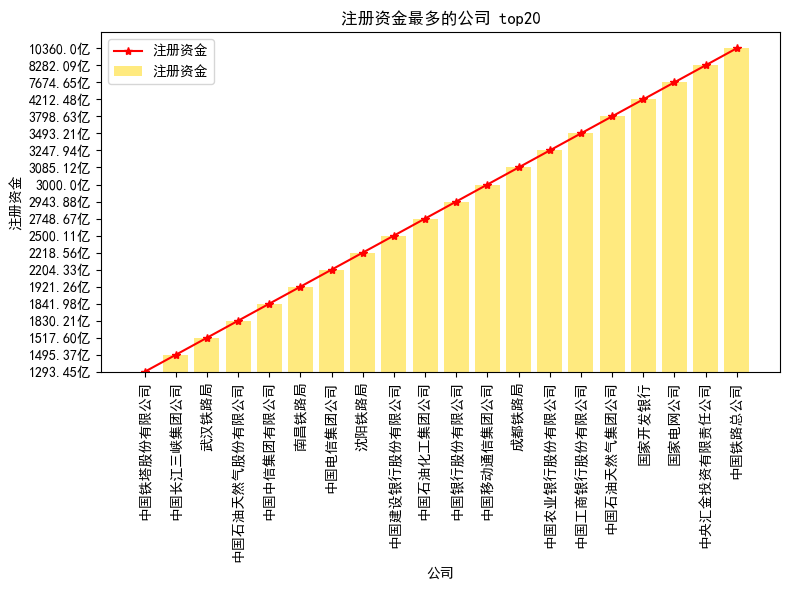

In [6]:
# 按capitalNum列从小到大排序
df_sorted = df_sorted.sort_values(by="capitalNum", ascending=True)

plt.figure(figsize=(8, 6))

# 绘制折线图
plt.plot(df_sorted["company"], df_sorted["capital"], marker='*', linestyle='-', color="red", label="注册资金")

# 绘制柱状图
plt.bar(df_sorted["company"], df_sorted["capital"], alpha=0.5, color="gold", label="注册资金")

plt.title("注册资金最多的公司 top20")
plt.xlabel("公司")
plt.xticks(rotation=90)
plt.ylabel("注册资金")
plt.legend()
plt.tight_layout()

plt.savefig('注册资金最多的公司 top20.png', format='png')

plt.show()